[3. 0. 3. 6.]


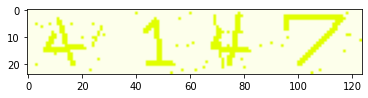

In [1]:
import cv2
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

encoding = '123456789'
root_dir = 'dataset'

img_list = []
label_list = []
for root, dirs, files in os.walk(root_dir):
    if root == root_dir:
        img_list.extend([root+'/'+f for f in files])
        for f in files:
            label = []
            for i in range(4):
                label.append(encoding.index(f[i]))
            label_list.append(label) 
items= []
for i in range(len(img_list)):
    items.append(i)
X = []
y = []
for i in random.sample(items,len(img_list)):
    img = cv2.imread(img_list[i])
    img = tf.keras.preprocessing.image.img_to_array(img)
    X.append(img)
    y.append(label_list[i])
    
X = np.array(X).astype(float)
y = np.array(y).astype(float)


plt.imshow(X[0].astype(int))
print(y[0])
y = y.T # for traning, shape: (120, 4) => (4, 120)
y = [arr for arr in y]

In [2]:
inputs = tf.keras.Input((24, 124, 3))
x = tf.keras.layers.experimental.preprocessing.Resizing(96, 96)(inputs)
x = tf.keras.applications.MobileNetV2(input_shape=(96, 96, 3))(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = [tf.keras.layers.Dense(9, name='d1', activation='softmax')(x),\
           tf.keras.layers.Dense(9, name='d2', activation='softmax')(x),\
           tf.keras.layers.Dense(9, name='d3', activation='softmax')(x),\
           tf.keras.layers.Dense(9, name='d4', activation='softmax')(x)]
model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 24, 124, 3)] 0                                            
__________________________________________________________________________________________________
resizing (Resizing)             (None, 96, 96, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
mobilenetv2_1.00_96 (Functional (None, 1000)         3538984     resizing[0][0]                   
__________________________________________________________________________________________________
dropout (Dropout)               (None, 1000)         0           mobilenetv2_1.00_96[0][0]        
______________________________________________________________________________________________

In [3]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['CategoricalAccuracy'])
batch_size = 20
epochs = 200

In [4]:
history = model.fit(
    X, 
    y,
    batch_size = batch_size,
    epochs = epochs,
    validation_split = 0.833
)

Epoch 1/200
1/1 [==============================] - 7s 7s/step - loss: 8.7901 - d1_loss: 2.1979 - d2_loss: 2.1974 - d3_loss: 2.1960 - d4_loss: 2.1988 - d1_categorical_accuracy: 0.2000 - d2_categorical_accuracy: 0.0500 - d3_categorical_accuracy: 0.0500 - d4_categorical_accuracy: 0.1500 - val_loss: 8.7912 - val_d1_loss: 2.1971 - val_d2_loss: 2.1968 - val_d3_loss: 2.1967 - val_d4_loss: 2.2007 - val_d1_categorical_accuracy: 0.0000e+00 - val_d2_categorical_accuracy: 0.0100 - val_d3_categorical_accuracy: 0.0000e+00 - val_d4_categorical_accuracy: 0.0000e+00
Epoch 2/200
1/1 [==============================] - 0s 311ms/step - loss: 8.7133 - d1_loss: 2.1812 - d2_loss: 2.1762 - d3_loss: 2.1782 - d4_loss: 2.1778 - d1_categorical_accuracy: 0.1000 - d2_categorical_accuracy: 0.1000 - d3_categorical_accuracy: 0.1000 - d4_categorical_accuracy: 0.0500 - val_loss: 8.7887 - val_d1_loss: 2.1959 - val_d2_loss: 2.1957 - val_d3_loss: 2.1961 - val_d4_loss: 2.2010 - val_d1_categorical_accuracy: 0.0000e+00 - val_d

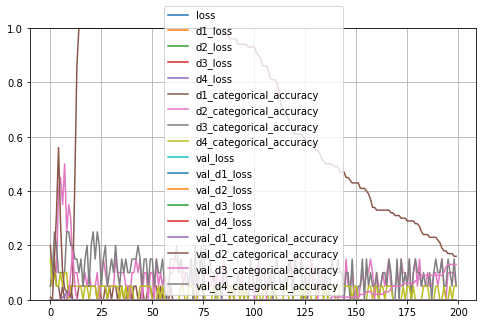

In [5]:
import pandas as pd
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()
plot_learning_curves(history)

[array([[0.08875874, 0.12353782, 0.10980064, 0.13265397, 0.08402872,
         0.09099492, 0.12652509, 0.1278711 , 0.11582902]], dtype=float32),
 array([[0.17634255, 0.09035607, 0.13581392, 0.09253196, 0.0864198 ,
         0.09823158, 0.12870209, 0.09637809, 0.09522396]], dtype=float32),
 array([[0.12450171, 0.09663676, 0.09245715, 0.11691834, 0.12630324,
         0.08696678, 0.13216083, 0.12200628, 0.10204893]], dtype=float32),
 array([[0.09449672, 0.09347787, 0.09640597, 0.12296417, 0.14572325,
         0.09530415, 0.1298225 , 0.13258655, 0.08921883]], dtype=float32)]

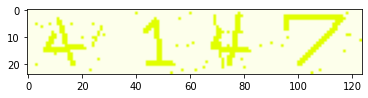

In [7]:
out = model.predict(np.expand_dims(X[0], 0))
plt.imshow(X[0].astype(int))
out